In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
def read_image_file(root_directory):
    filename = input("Enter a image file name :: ")
    filepath = os.path.join(root_directory, filename)
    img = cv2.imread(filepath)
    return img

In [8]:
def convert_grayscale(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_image

In [9]:
# Display gray images
def display_gray_images(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)

In [10]:
# Display RGB images
def display_color_images(img, title):
    plt.imshow(img)
    plt.title(title)

In [11]:
# Apply median filter
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

In [12]:
def find_median(arr):
    n = len(arr)
    arr.sort()
    if n % 2 == 0:
        median = (arr[n // 2 - 1] + arr[n // 2]) / 2
    else:
        median = arr[n // 2]
    return median

In [13]:
def median_filter_custom(img, kernel_size):
    rows, cols = img.shape
    pad_size = kernel_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    
    modified_image = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            neighbours = []
            for p in range(-pad_size, pad_size + 1):
                for q in range(-pad_size, pad_size + 1):
                    neighbours.append(padded_img[i + pad_size + p, j + pad_size + q])
                    
            modified_image[i, j] = find_median(neighbours)
    
    return modified_image

Enter a image file name :: im4.jpg
Enter kernel size :: 5


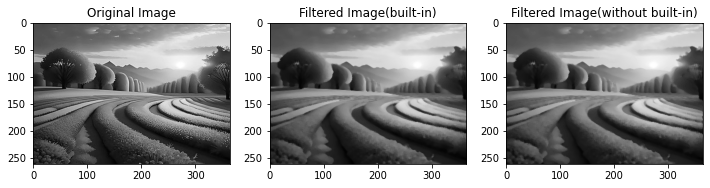

In [14]:
original_image = read_image_file("20_images_folder")
if original_image is None:
    print("Failed to load image")
else:
    gray_image = convert_grayscale(original_image)
    kernel_size = int(input("Enter kernel size :: "))
    filtered_image1 = apply_median_filter(gray_image, kernel_size)
    filtered_image2 = median_filter_custom(gray_image, kernel_size)


    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    display_gray_images(gray_image, 'Original Image')

    plt.subplot(1, 3, 2)
    display_gray_images(filtered_image1, 'Filtered Image(built-in)')

    plt.subplot(1, 3, 3)
    display_gray_images(filtered_image2, 'Filtered Image(without built-in)')

In [15]:
def resize_image(image, target_size):
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [16]:
def average_images(image_list, target_size):
    avg_image = np.zeros(target_size, dtype=np.float32)
    
    # Sum all images
    for path in image_list:
        img = resize_image(path, target_size).astype(np.float32)
        avg_image += img

    # Divide by the number of images to get the average
    avg_image /= len(image_list)
    
    # Convert back to uint8
    avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)
    
    return avg_image

Enter no of images :: 5
Enter a image file name :: im1.jpg
Enter a image file name :: im2.jpg
Enter a image file name :: im3.jpg
Enter a image file name :: im4.jpg
Enter a image file name :: im5.jpg


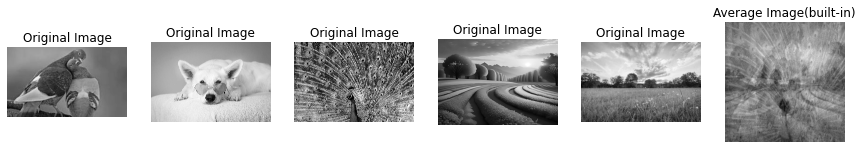

In [17]:
imgList = []
n = int(input("Enter no of images :: "))
for i in range(n): 
    original_image = read_image_file("20_images_folder")
    if original_image is None:
        print("Failed to load image")
    else:
        gray_image = convert_grayscale(original_image)
        imgList.append(gray_image)
        
target_size = (512, 512)  # You can set this to any size you prefer

average_image1 = average_images(imgList, target_size)
# average_img2 = find_average_image(imgList)


plt.figure(figsize=(15, 5))

for i in range(n + 1): 
    ax = plt.subplot(1, n + 1, i+1)
    plt.axis('off')
    if i != n :
        display_gray_images(imgList[i], 'Original Image')
    else:
        display_gray_images(average_image1, 'Average Image(built-in)')
    
# plt.subplot(1, 3, 3)
# display_gray_images(filtered_image2, 'Filtered Image(without built-in)')



In [18]:
def resize_image(image, target_size):
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [19]:
def average_images(image_list, target_size):
    avg_image = np.zeros(target_size, dtype=np.float32)
    
    # Sum all images
    for path in image_list:
        img = resize_image(path, target_size).astype(np.float32)
        avg_image += img

    # Divide by the number of images to get the average
    avg_image /= len(image_list)
    
    # Convert back to uint8
    avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)
    
    return avg_image

Enter no of images :: 5
Enter a image file name :: im1.jpg
Enter a image file name :: im2.jpg
Enter a image file name :: im3.jpg
Enter a image file name :: im4.jpg
Enter a image file name :: im5.jpg


C:\Users\User\AppData\Local\Temp/ipykernel_8020/317020326.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 3)


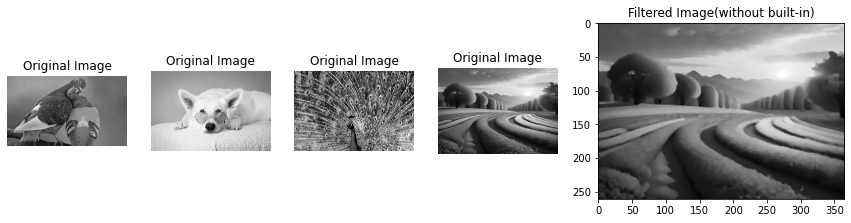

In [20]:
imgList = []
n = int(input("Enter no of images :: "))
for i in range(n): 
    original_image = read_image_file("20_images_folder")
    if original_image is None:
        print("Failed to load image")
    else:
        gray_image = convert_grayscale(original_image)
        imgList.append(gray_image)
        
target_size = (512, 512)  # You can set this to any size you prefer

average_image1 = average_images(imgList, target_size)
# average_img2 = find_average_image(imgList)


plt.figure(figsize=(15, 5))

for i in range(n + 1): 
    ax = plt.subplot(1, n + 1, i+1)
    plt.axis('off')
    if i != n :
        display_gray_images(imgList[i], 'Original Image')
    else:
        display_gray_images(average_image1, 'Average Image(built-in)')
    
plt.subplot(1, 3, 3)
display_gray_images(filtered_image2, 'Filtered Image(without built-in)')

